In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# This part tries to use the entire captcha (27 different classes)

In [45]:
def getImages():
    path = "imagedata/"
    listOfImages= []
    kernel = np.ones((3,3),np.uint8)
    for imageFileName in sorted(os.listdir(path)):
        img = cv2.imread(path+imageFileName,cv2.IMREAD_UNCHANGED)
        eroded = cv2.dilate(img, kernel, iterations = 1)
        cropped= eroded[50:140,70:200]
        listOfImages.append(np.array(cropped))
    listOfImages = np.array(listOfImages)
    listOfImages = listOfImages.reshape(list(listOfImages.shape)+[1])
    return listOfImages

listOfImages = getImages()

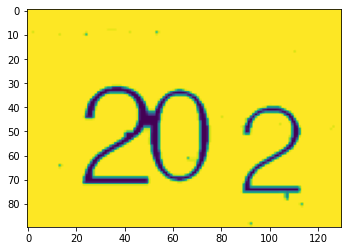

In [46]:
plt.imshow(listOfImages[0])

In [3]:
def getLabels():
    listOfLabels = []
    with open('labels.txt') as fp:
        line = fp.readline()
        while line:
            listOfLabels.append(np.array(float(line.replace(',', '').replace(" ", "").strip())))
            line=fp.readline()
    listOfLabels = np.array(listOfLabels)
    return listOfLabels

listOfLabels = getLabels()

In [4]:
def createCategorical(listOfLabels):
    uniqueValuesCategories = np.array(list(range(0,27)))
    unique = np.unique(listOfLabels)
    dict = {}
    for key,value in zip(unique,uniqueValuesCategories):
        dict[key] = value
    newLabels = listOfLabels
    newLabels = list(map(dict.get,newLabels))
    categories = tf.keras.utils.to_categorical(newLabels)
    return categories, dict

y,dict = createCategorical(listOfLabels)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    listOfImages, y, test_size=0.33, random_state=42)


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(50, 35, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu',kernel_initializer='he_uniform'))
model.add(layers.Dense(3, activation='softmax'))


In [21]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train
                    , batch_size = 90, epochs=10, shuffle = True,
                    validation_data=(X_test, y_test))

Epoch 1/10
27/27 [==============================] - 1s 43ms/step - loss: 1.0951 - accuracy: 0.4954 - val_loss: 0.6987 - val_accuracy: 0.7382
Epoch 2/10
27/27 [==============================] - 1s 39ms/step - loss: 0.4862 - accuracy: 0.8350 - val_loss: 0.1510 - val_accuracy: 0.9529
Epoch 3/10
27/27 [==============================] - 1s 39ms/step - loss: 0.0909 - accuracy: 0.9743 - val_loss: 0.0454 - val_accuracy: 0.9848
Epoch 4/10
27/27 [==============================] - 1s 40ms/step - loss: 0.0196 - accuracy: 0.9959 - val_loss: 0.0191 - val_accuracy: 0.9949
Epoch 5/10
27/27 [==============================] - 1s 40ms/step - loss: 0.0064 - accuracy: 0.9996 - val_loss: 0.0101 - val_accuracy: 0.9983
Epoch 6/10
27/27 [==============================] - 1s 39ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9983
Epoch 7/10
27/27 [==============================] - 1s 40ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9992
Epoch 8/10
27

In [25]:
a= model.predict_classes(X_test)

In [27]:
print(a[:10])

[0 1 1 2 0 1 0 1 2 0]


In [219]:
newX=[]
newY=[]
for i in range(27):
    count = 0
    for j in range(len(X_train)):
        
        if y_train[j][i]==1:
            count += 1
    print("class {}: {}".format(i,count))

class 0: 28
class 1: 25
class 2: 24
class 3: 34
class 4: 32
class 5: 30
class 6: 39
class 7: 34
class 8: 29
class 9: 26
class 10: 31
class 11: 28
class 12: 26
class 13: 38
class 14: 25
class 15: 23
class 16: 47
class 17: 33
class 18: 21
class 19: 25
class 20: 28
class 21: 27
class 22: 25
class 23: 28
class 24: 34
class 25: 26
class 26: 38


# This part only uses the digits cropped 

In [105]:
def getImages2(pathToDirectory):
    listOfImages= []
    kernel = np.ones((3,3),np.uint8)
    for imageFileName in sorted(os.listdir(path)):
        img = cv2.imread(pathToDirectory+imageFileName,cv2.IMREAD_UNCHANGED)
        eroded = cv2.dilate(img, kernel, iterations = 1)
#         thresholded = cv2.THRESH_BINARY
        cropped= eroded[50:140,70:200]
        first = cropped [30:80,15:50]
        second = cropped [30:80,15+30:50+30]
        third = cropped [30:80,15+60:50+60]
        listOfImages.extend([first,second,third])
    listOfImages = np.array(listOfImages)
    listOfImages = listOfImages.reshape(listOfImages.shape[0],50,35,1)
    listOfimagesNorm = listOfImages.astype('float32')
    listOfimagesNorm = listOfimagesNorm  / 255.0
    return listOfimagesNorm

listOfImages = getImages2("imagedata/")

In [104]:
def getLabels2(path):
    listOfLabels = []
    with open(path) as fp:
        line = fp.readline()
        while line:
            parsedLine = line.replace(',', '').replace(" ", "").strip()
            listOfLabels.extend([int(i) for i in list(parsedLine)])
            line=fp.readline()
                    
    listOfLabels = np.array(listOfLabels)
    return listOfLabels

listOfLabels = getLabels2('labels.txt')

In [16]:
categories = tf.keras.utils.to_categorical(listOfLabels)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    listOfImages, categories, test_size=0.33, random_state=42)


In [25]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(50, 35, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model2 = define_model()

In [26]:
history = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
76/76 [==============================] - 1s 15ms/step - loss: 0.9154 - accuracy: 0.6907 - val_loss: 0.1511 - val_accuracy: 0.9722
Epoch 2/10
76/76 [==============================] - 1s 13ms/step - loss: 0.0750 - accuracy: 0.9871 - val_loss: 0.0472 - val_accuracy: 0.9882
Epoch 3/10
76/76 [==============================] - 1s 13ms/step - loss: 0.0143 - accuracy: 0.9992 - val_loss: 0.0162 - val_accuracy: 0.9966
Epoch 4/10
76/76 [==============================] - 1s 13ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9975
Epoch 5/10
76/76 [==============================] - 1s 13ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9975
Epoch 6/10
76/76 [==============================] - 1s 13ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9975
Epoch 7/10
76/76 [==============================] - 1s 13ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9975
Epoch 8/10
76

In [ ]:
predictions = model2.predict_classes(X_test)

In [109]:
from sklearn.metrics import accuracy_score

def score(labelsTxtFile,imagesDir,model): # score( takes the labels.txt, takes directory of the images, the model to predict with)
    labels = getLabels2(labelsTxtFile)
    images = getImages2(imagesDir)
    preds = model.predict_classes(images)
    print(f"The accuracy is: {accuracy_score(labels, preds)}")
    
    
score("labels.txt","imagedata/",model2)
    


The accuracy is: 0.9994444444444445


In [102]:
#Predict one image
def predict(pathToImage,model):
    listOfImages=[] 
    img = cv2.imread(pathToImage,cv2.IMREAD_UNCHANGED)
    
    kernel = np.ones((3,3),np.uint8)
    dilated = cv2.dilate(img, kernel, iterations = 1) #Dilating the image
    
    #-------Crop the image into three parts----------#
    cropped= dilated[50:140,70:200]
    first = cropped [30:80,15:50]
    second = cropped [30:80,15+30:50+30]
    third = cropped [30:80,15+60:50+60] 
    
    
    listOfImages.extend([first,second,third])
    
    
    listOfImages = np.array(listOfImages)
    listOfImages = listOfImages.reshape(listOfImages.shape[0],50,35,1) # Reshape to add last dimension for cnn
    listOfimagesNorm = listOfImages.astype('float32')
    listOfimagesNorm = listOfimagesNorm  / 255.0
    
    prediction = model.predict_classes(listOfImages) # Running the model to predict the three numbers
    print(f"The captcha contains {prediction[0]}{prediction[1]}{prediction[2]}")
    return()

In [103]:
predict(path+os.listdir("imagedata")[0],model2)

The captcha is 122
